# SEER Project Background

The Surveillance, Epidemiology, and End Results (SEER) Program provides information on cancer statistics in an effort to reduce the cancer burden among the U.S. population. SEER is supported by the Surveillance Research Program (SRP) in NCI's Division of Cancer Control and Population Sciences (DCCPS). The data has patient information of last 16 years (2000-2016). The aim of this analysis is to predict the cancer grade based on health information. 

# Data

In [3]:
data <- read.csv("COLRECT-decoded.csv")

**Column names**

The data containts patients' demographic as well as physical health information. The variables are a mix of ordinal and nominal and hence will require some preprocessing. Most variables have high cardinality as well.

In [4]:
str(data)

'data.frame':	939119 obs. of  35 variables:
 $ PUBCSNUM   : int  5100092 5100097 5100097 5100173 5100322 5100373 5100412 5100444 5100473 5100511 ...
 $ REG        : Factor w/ 21 levels "Alaska","Connecticut",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ RACEIV     : Factor w/ 30 levels "American Indian, Aleutian, Alaskan Native or Eskimo",..: 30 30 30 30 30 30 30 30 30 30 ...
 $ SEX        : Factor w/ 2 levels "Female","Male": 1 2 2 1 1 1 1 2 1 2 ...
 $ AGE_DX     : int  80 77 77 85 86 69 88 86 98 82 ...
 $ YR_BIRTH   : int  1933 1929 1929 1917 1926 1932 1918 1916 1911 1929 ...
 $ SEQ_NUM    : int  2 3 4 2 2 2 2 3 3 3 ...
 $ MDXRECMP   : int  6 2 2 5 9 12 7 7 7 5 ...
 $ YEAR_DX    : int  2014 2007 2007 2002 2012 2001 2006 2003 2009 2011 ...
 $ PRIMSITE   : Factor w/ 13 levels "C180","C181",..: 1 11 1 5 8 12 8 8 11 8 ...
 $ LATERAL    : Factor w/ 6 levels "Bilateral involvement",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ HISTO3V    : int  8000 8210 8140 8140 8210 8083 8480 8480 8020 8140 ...
 $ BEHO3V     : Facto

# Libraries

In [14]:
library(ggplot2)
library(repr)
options(repr.plot.width=8, repr.plot.height=6)

# Visualizations

## Grade

Grade is our target variable that we will be predicting.

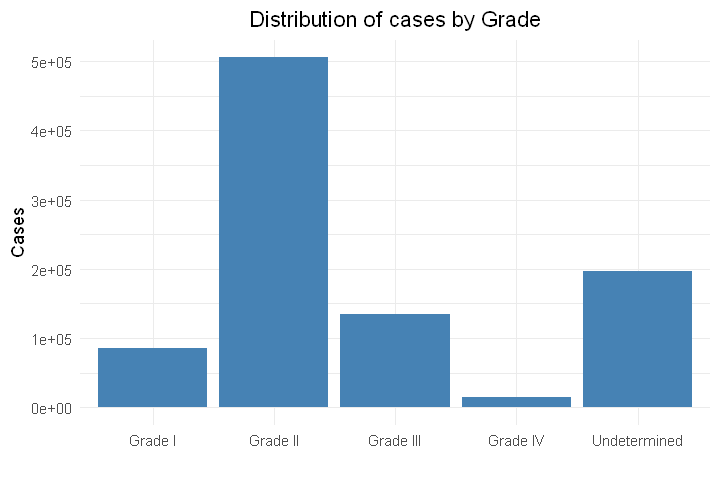

In [12]:
#Barplot for grade
grade <-ggplot(data=data, aes(GRADE)) +
  geom_bar(fill="steelblue")+
  theme_minimal()+
  labs(title = "Distribution of cases by Grade", x = "", y = "Cases")+
  theme(plot.title = element_text(hjust = 0.5))
grade

## Registries

Registries are one of the many locations where the patietnt cases are registered and the data is collected.

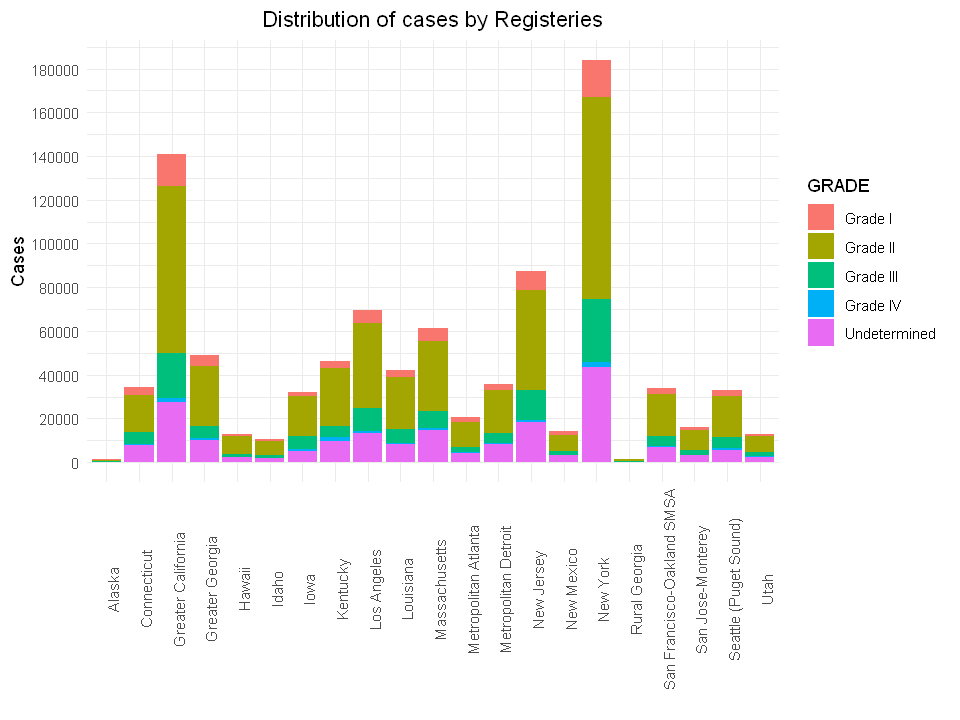

In [15]:
reg <-ggplot(data=data, aes(factor(REG))) +
  geom_bar(aes(fill=GRADE))+
  theme_minimal()+
  labs(title = "Distribution of cases by Registeries", x = "", y = "Cases")+
  theme(plot.title = element_text(hjust = 0.5), axis.text.x = element_text(angle=90, vjust=1))+
  scale_y_continuous(breaks = seq(0, 200000, by = 20000))

reg


## Sex

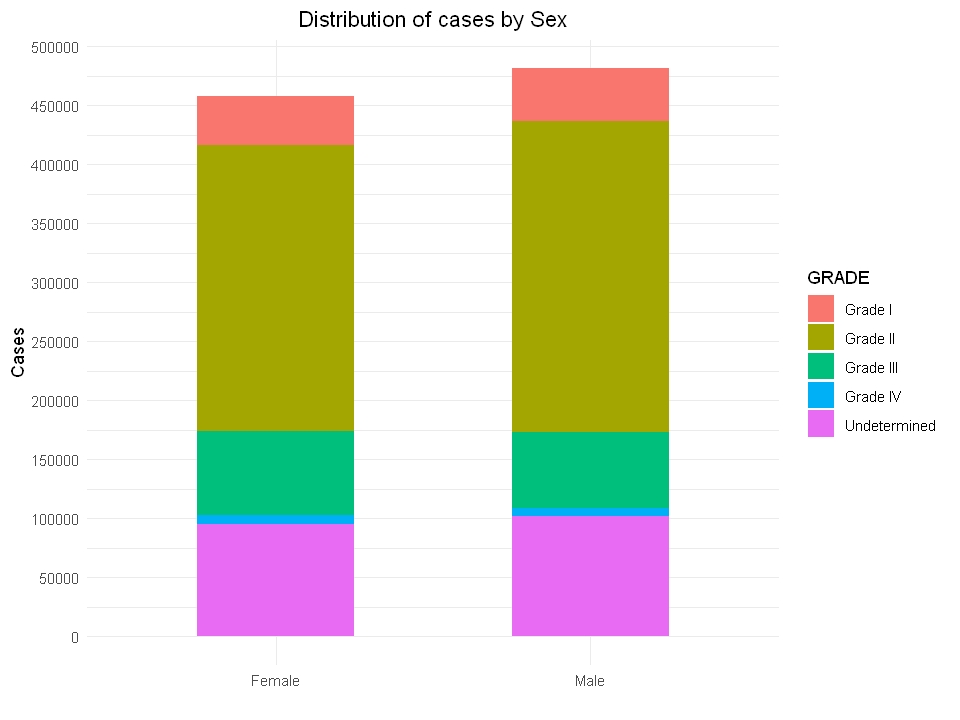

In [16]:
#Barplot for Sex
sex <-ggplot(data=data, aes(factor(SEX))) +
  geom_bar(aes(fill=GRADE), width = 0.5)+
  theme_minimal()+
  labs(title = "Distribution of cases by Sex", x = "", y = "Cases")+
  theme(plot.title = element_text(hjust = 0.5), axis.text.x = element_text(angle=0, vjust=1))+
  scale_y_continuous(breaks = seq(0, 500000, by = 50000))

sex

## Age

Warning message:
"Removed 462 rows containing non-finite values (stat_bin)."Warning message:
"Removed 10 rows containing missing values (geom_bar)."

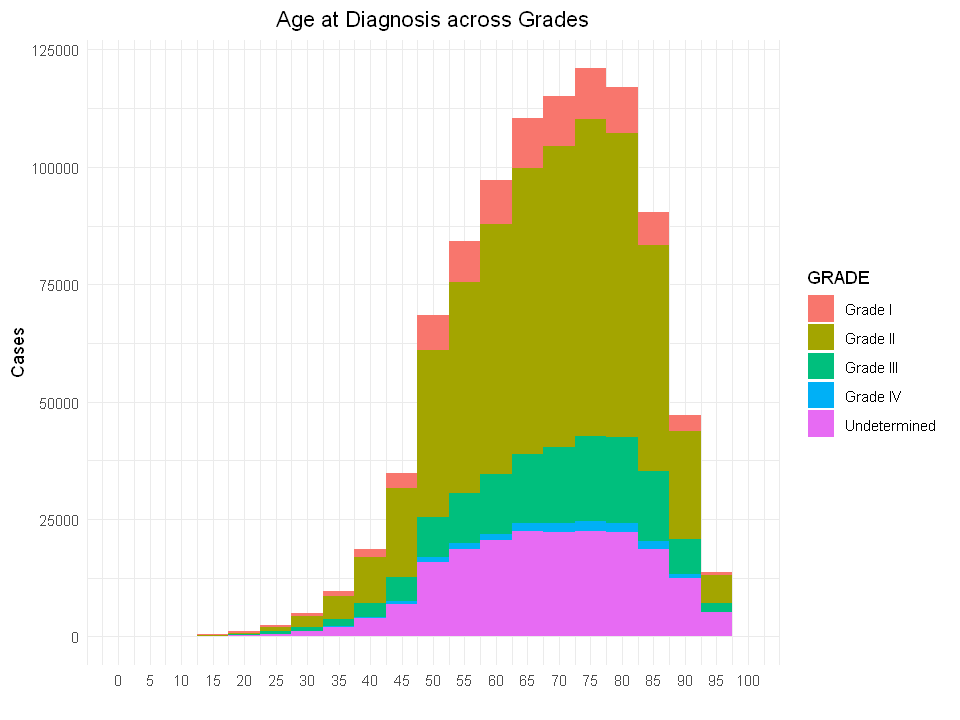

In [17]:
age <-ggplot(data=data, aes(x=AGE_DX, fill=GRADE))+
  geom_histogram(binwidth = 5)+
  theme_minimal()+
  labs(title = "Age at Diagnosis across Grades", x = "", y = "Cases")+
  scale_x_continuous(breaks = seq(0, 100, 5), limits = c(0,100))+
  theme(plot.title = element_text(hjust = 0.5), axis.text.x = element_text(angle=0, vjust=1))
  
age

## Sequence Number

Sequence Number-Central describes the number and sequence of all
reportable malignant, in situ, benign, and borderline primary tumors, which
occur over the lifetime of a patient. The sequence number may change over
the lifetime of the patient. If an individual previously diagnosed with a
single reportable malignant neoplasm is subsequently diagnosed with a
second reportable malignant neoplasm, the sequence code for the first
neoplasm changes from 00 to 01.

This sequence number counts all tumors that were reportable in the year they
were diagnosed even if the tumors occurred before the registry existed, or
before the registry participated in the SEER Program. The purpose of
sequencing based on the patient’s lifetime is to truly identify the patients for
survival analysis who only had one malignant primary in their lifetimes.

Warning message:
"Removed 292 rows containing non-finite values (stat_count)."

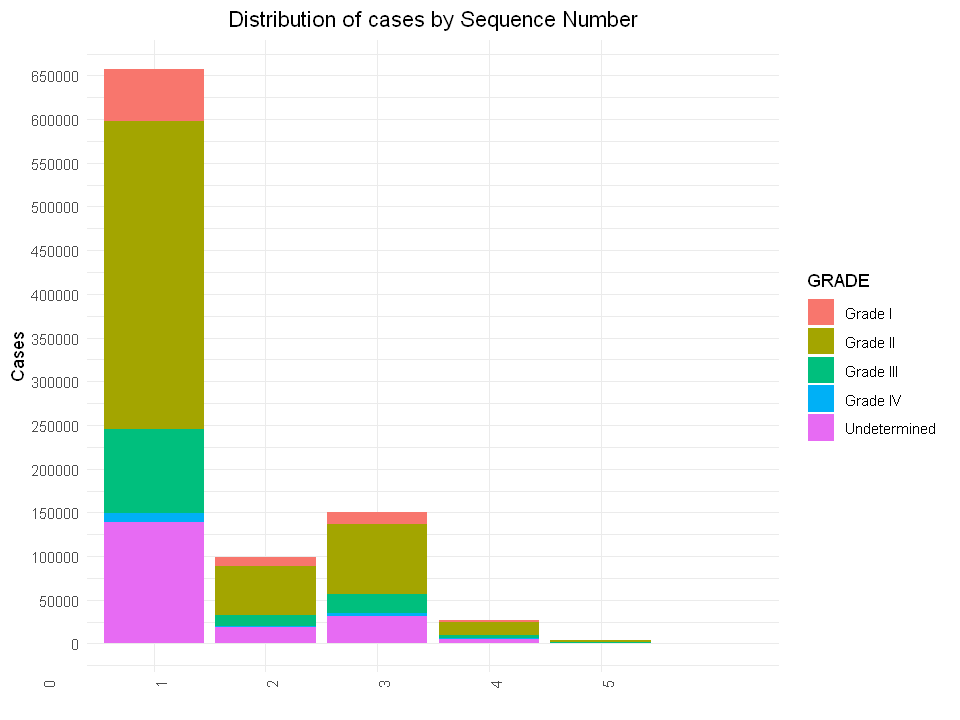

In [18]:
seq <-ggplot(data=data, aes(factor(SEQ_NUM))) +
  geom_bar(aes(fill=GRADE))+
  theme_minimal()+
  labs(title = "Distribution of cases by Sequence Number", x = "", y = "Cases")+
  theme(plot.title = element_text(hjust = 0.5), axis.text.x = element_text(angle=90, vjust=1))+
  scale_y_continuous(breaks = seq(0, 800000, by = 50000))+
  scale_x_discrete(breaks = seq(0, 5, by = 1), limits = c(0:5))

seq

## Month of Diagnosis

The month of diagnosis is the month the tumor was first diagnosed by a
recognized medical practitioner, whether clinically or microscopically
confirmed.

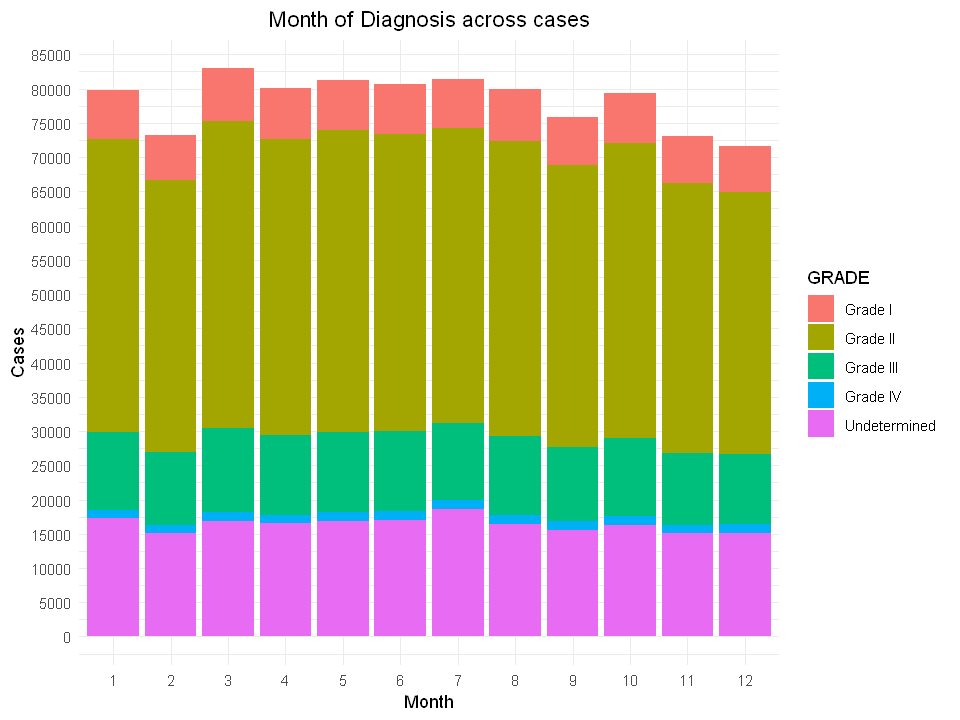

In [19]:
mdx <-ggplot(data=data, aes(factor(MDXRECMP))) +
  geom_bar(aes(fill=GRADE))+
  theme_minimal()+
  labs(title = "Month of Diagnosis across cases", x = "Month", y = "Cases")+
  theme(plot.title = element_text(hjust = 0.5), axis.text.x = element_text(angle=0, vjust=1))+
  scale_y_continuous(breaks = seq(0, 800000, by = 5000))
  #scale_x_discrete(breaks = seq(0, 5, by = 1), limits = c(0:5))

mdx

## Year of Diagnosis

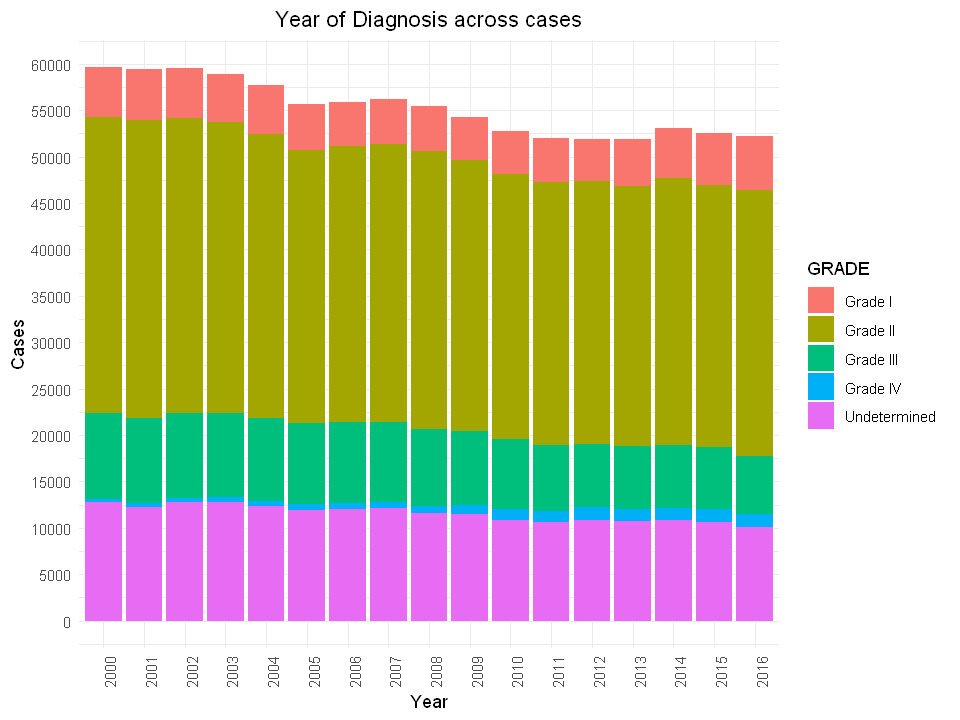

In [20]:
ydx <-ggplot(data=data, aes(factor(YEAR_DX))) +
  geom_bar(aes(fill=GRADE))+
  theme_minimal()+
  labs(title = "Year of Diagnosis across cases", x = "Year", y = "Cases")+
  theme(plot.title = element_text(hjust = 0.5), axis.text.x = element_text(angle=90, vjust=1))+
  scale_y_continuous(breaks = seq(0, 800000, by = 5000))
#scale_x_discrete(breaks = seq(0, 5, by = 1), limits = c(0:5))

ydx

## Primary Site

This data item identifies the site in which the primary tumor originated. See
the International Classification of Diseases for Oncology, Third Edition
(ICD-O-3) for topography codes. The decimal point is eliminated.

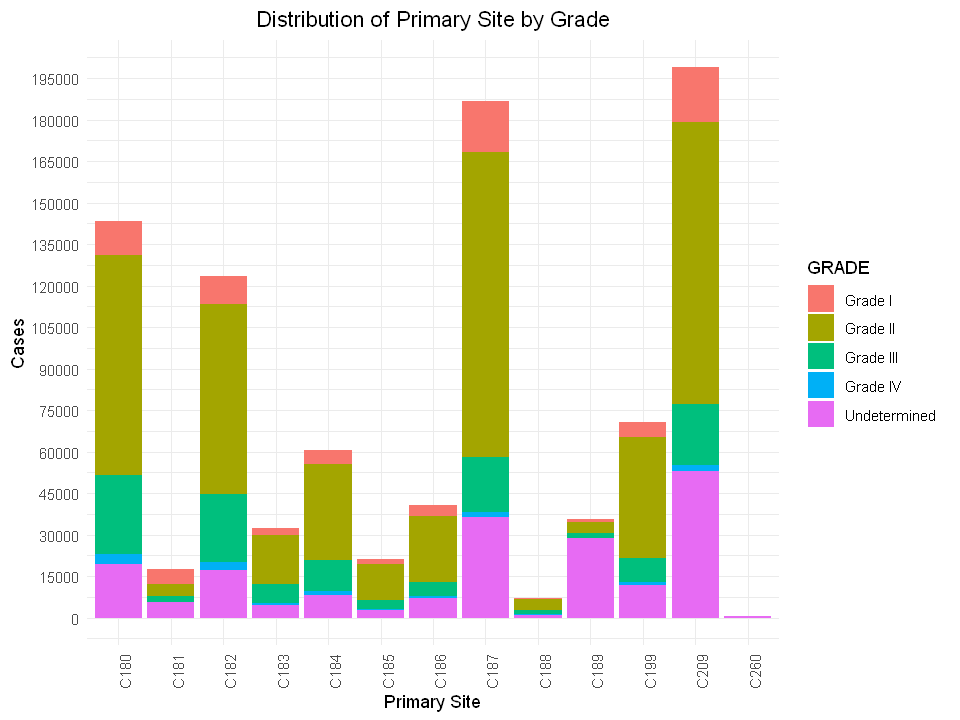

In [21]:
prim <-ggplot(data=data, aes(factor(PRIMSITE))) +
  geom_bar(aes(fill=GRADE))+
  theme_minimal()+
  labs(title = "Distribution of Primary Site by Grade", x = "Primary Site", y = "Cases")+
  theme(plot.title = element_text(hjust = 0.5), axis.text.x = element_text(angle=90, vjust=1))+
  scale_y_continuous(breaks = seq(0, 800000, by = 15000))
#scale_x_discrete(breaks = seq(0, 5, by = 1), limits = c(0:5))

prim

## Laterality

Laterality describes the side of a paired organ or side of the body on which
the reportable tumor originated. Starting with cases diagnosed January 1,
2004 and later, laterality is coded for select invasive, benign, and borderline
primary intracranial and CNS tumors.
See http://seer.cancer.gov/manuals/primsite.laterality.pdf for a list of sites for
which SEER requires information on laterality.

In [ ]:
lat <-ggplot(data=data, aes(factor(LATERAL))) +
  geom_bar(aes(fill=GRADE))+
  theme_minimal()+
  labs(title = "Laterality across cases by Grade", x = "Laterality", y = "Cases")+
  theme(plot.title = element_text(hjust = 0.5), axis.text.x = element_text(angle=90, vjust=1))+
  scale_y_continuous(breaks = seq(0, 1000000, by = 50000))
#scale_x_discrete(breaks = seq(0, 5, by = 1), limits = c(0:5))

lat

## Histologic Type

The data item Histologic Type describes the microscopic composition of
cells and/or tissue for a specific primary. The tumor type or histology is a
basis for staging and determination of treatment options. It affects the
prognosis and course of the disease. The International Classification of
Diseases for Oncology, Third Edition (ICD-O-3) is the standard reference for
coding the histology for tumors diagnosed in 2001 and later.

Warning message:
"Removed 45897 rows containing non-finite values (stat_count)."

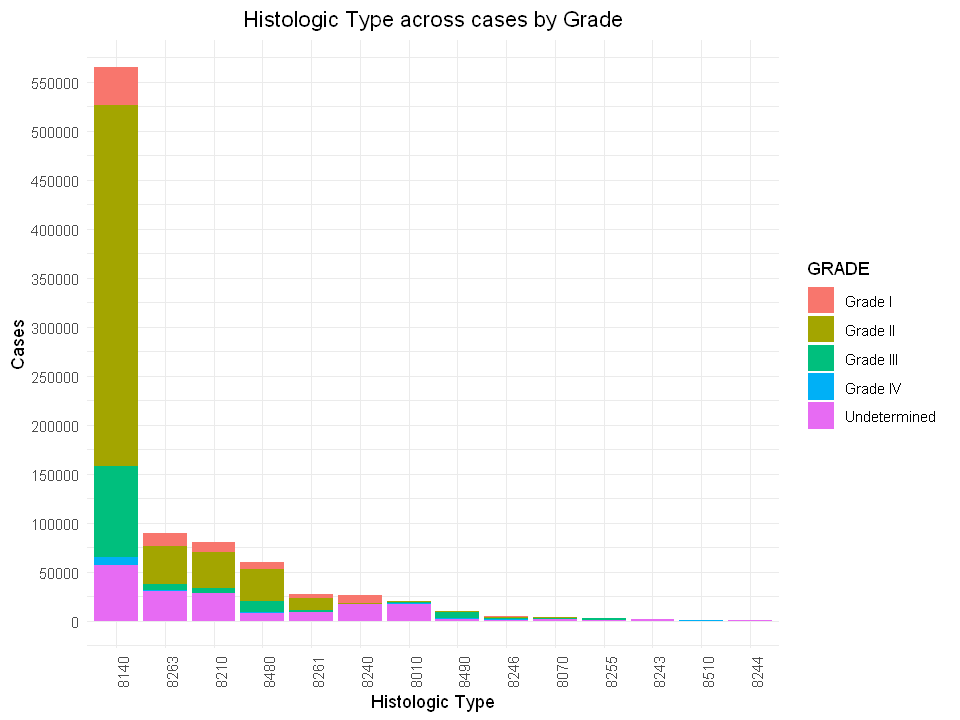

In [22]:
hist <-ggplot(data=data, aes(factor(HISTO3V))) +
  geom_bar(aes(fill=GRADE))+
  theme_minimal()+
  labs(title = "Histologic Type across cases by Grade", x = "Histologic Type", y = "Cases")+
  theme(plot.title = element_text(hjust = 0.5), axis.text.x = element_text(angle=90, vjust=1))+
  scale_y_continuous(breaks = seq(0, 1000000, by = 50000))+
  scale_x_discrete(limits = c('8140','8263','8210','8480','8261','8240','8010','8490','8246','8070',
                              '8255','8243','8510','8244'),
                   labels = c('8140','8263','8210','8480','8261','8240','8010','8490','8246','8070',
                   '8255','8243','8510','8244'))

hist

## Behaviour Code

SEER requires registries to collect malignancies with in situ /2 and malignant
/3 behavior codes as described in ICD-O-3. SEER requires registries to
collect benign /0 and borderline /1 intracranial and CNS tumors for cases
diagnosed on or after 1/1/2004. Behavior is the fifth digit of the morphology
code after the slash (/). See ICD-O-3 (page 66) for a discussion of the
behavior code.

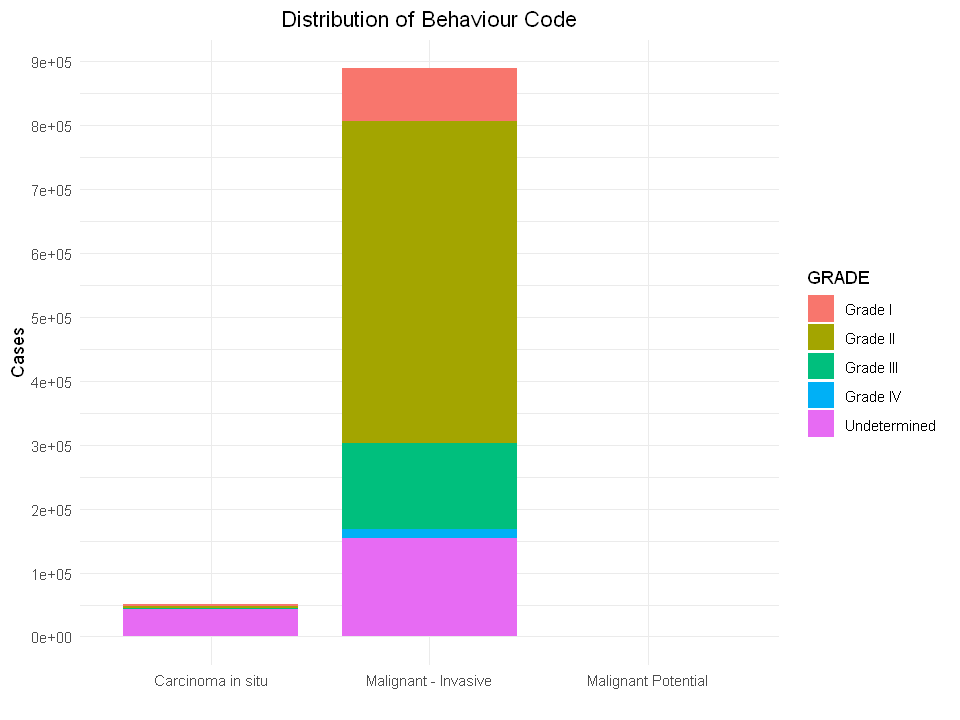

In [23]:
beh <-ggplot(data=data, aes(factor(BEHO3V))) +
  geom_bar(aes(fill=GRADE), width=0.8)+
  theme_minimal()+
  labs(title = "Distribution of Behaviour Code", x = "", y = "Cases")+
  theme(plot.title = element_text(hjust = 0.5), axis.text.x = element_text(angle=0, vjust=1))+
  scale_y_continuous(breaks = seq(0, 1000000, by = 100000))
#scale_x_discrete(breaks = seq(0, 5, by = 1), limits = c(0:5))

beh

## Diagnostic Confirmation

This data item records the best method used to confirm the presence of the
cancer being reported. The data item is not limited to the confirmation at the
time of diagnosis; it is the best method of confirmation during the entire
course of the disease.

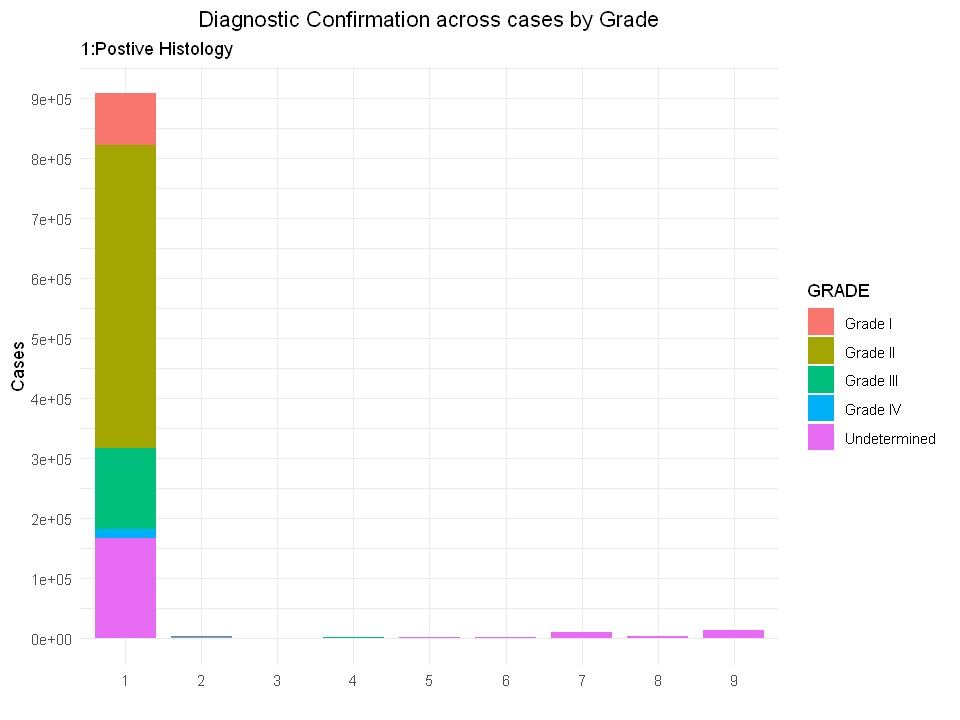

In [24]:
dxconf <-ggplot(data=data, aes(factor(DX_CONF))) +
  geom_bar(aes(fill=GRADE), width=0.8)+
  theme_minimal()+
  labs(title = "Diagnostic Confirmation across cases by Grade", x = "", y = "Cases", subtitle="1:Postive Histology")+
  theme(plot.title = element_text(hjust = 0.5), axis.text.x = element_text(angle=0, vjust=1))+
  scale_y_continuous(breaks = seq(0, 1000000, by = 100000))
#scale_x_discrete(breaks = seq(0, 5, by = 1), limits = c(0:5))

dxconf

## Reporting Source

The Type of Reporting Source identifies the source documents used to
abstract the case. This is not necessarily the original document that identified
the case; rather, it is the source that provided the best information.

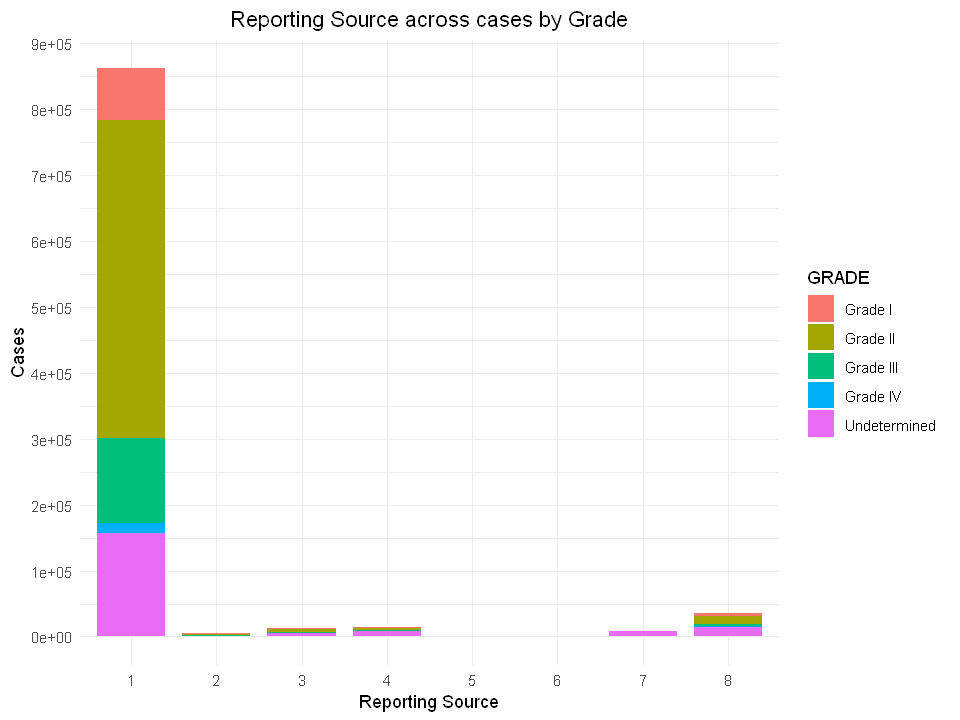

In [25]:
rsrc <-ggplot(data=data, aes(factor(REPT_SRC))) +
  geom_bar(aes(fill=GRADE), width=0.8)+
  theme_minimal()+
  labs(title = "Reporting Source across cases by Grade", x = "Reporting Source", y = "Cases")+
  theme(plot.title = element_text(hjust = 0.5), axis.text.x = element_text(angle=0, vjust=1))+
  scale_y_continuous(breaks = seq(0, 1000000, by = 100000))
#scale_x_discrete(breaks = seq(0, 5, by = 1), limits = c(0:5))

rsrc

## Behaviour Recode

This recode was created so that data analyses could eliminate major groups
of histologies/behaviors that weren't collected consistently over time, for
example benign brain, myelodysplastic syndromes, and borderline tumors of
the ovary. Created from ICD-O-3 behavior and histology. For more
information, see http://seer.cancer.gov/behavrecode.

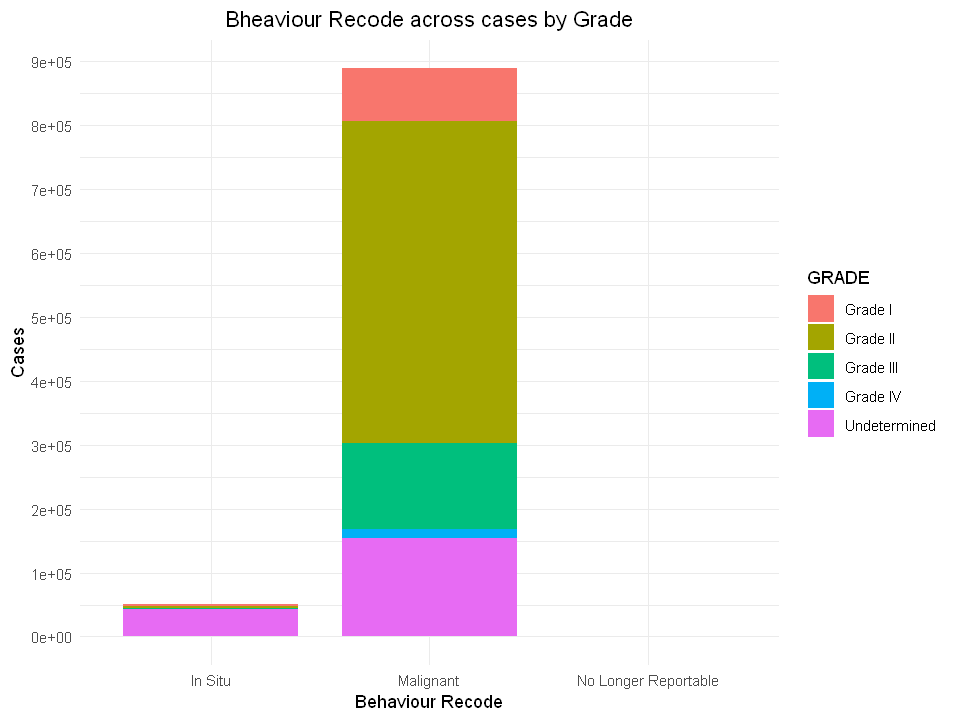

In [26]:
brc <-ggplot(data=data, aes(factor(BEHTREND))) +
  geom_bar(aes(fill=GRADE), width=0.8)+
  theme_minimal()+
  labs(title = "Bheaviour Recode across cases by Grade", x = "Behaviour Recode", y = "Cases")+
  theme(plot.title = element_text(hjust = 0.5), axis.text.x = element_text(angle=0, vjust=1))+
  scale_y_continuous(breaks = seq(0, 1000000, by = 100000))+
  scale_x_discrete(labels = c("In Situ", "Malignant", "No Longer Reportable"))

brc

## Race

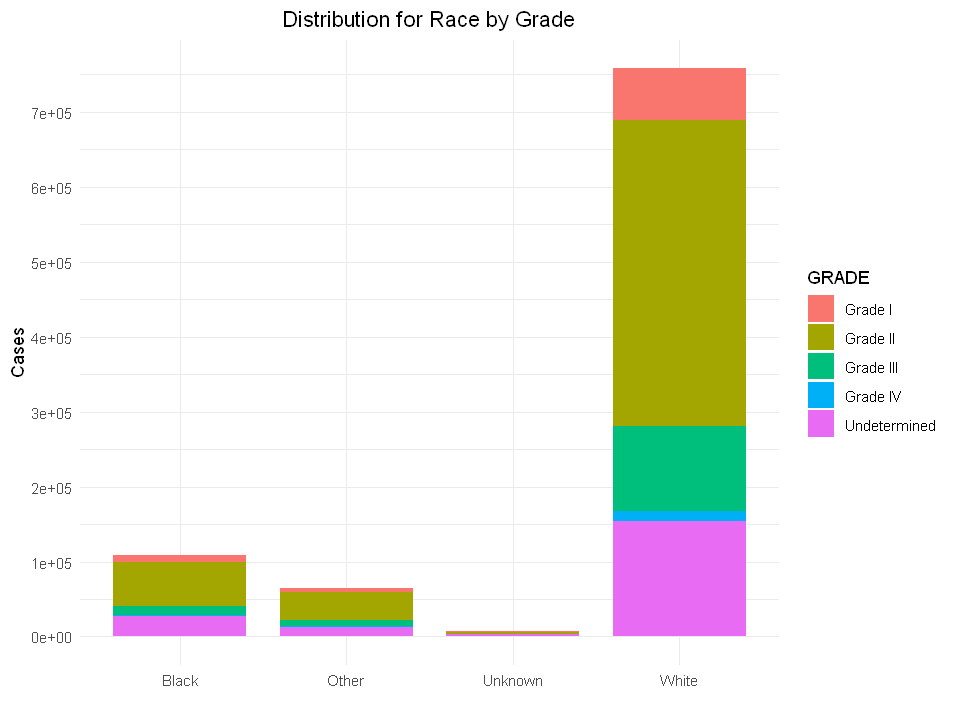

In [27]:
racreca <-ggplot(data=data, aes(factor(RAC_RECA))) +
  geom_bar(aes(fill=GRADE), width=0.8)+
  theme_minimal()+
  labs(title = "Distribution for Race by Grade", x = "", y = "Cases")+
  theme(plot.title = element_text(hjust = 0.5), axis.text.x = element_text(angle=0, vjust=1))+
  scale_y_continuous(breaks = seq(0, 1000000, by = 100000))
  #scale_x_discrete(labels = c("In Situ", "Malignant", "No Longer Reportable"))

racreca


## Origin Recode

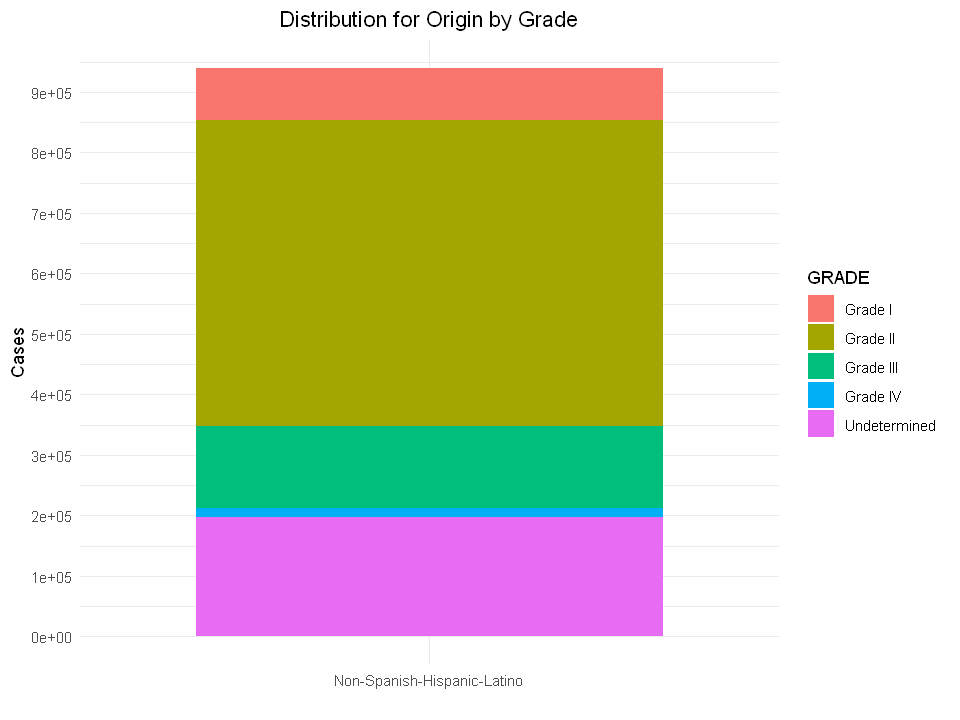

In [28]:
ori <-ggplot(data=data, aes(factor(ORIGRECB))) +
  geom_bar(aes(fill=GRADE), width=0.8)+
  theme_minimal()+
  labs(title = "Distribution for Origin by Grade", x = "", y = "Cases")+
  theme(plot.title = element_text(hjust = 0.5), axis.text.x = element_text(angle=0, vjust=1))+
  scale_y_continuous(breaks = seq(0, 1000000, by = 100000))
#scale_x_discrete(labels = c("In Situ", "Malignant", "No Longer Reportable"))

ori

## Breast Subtype

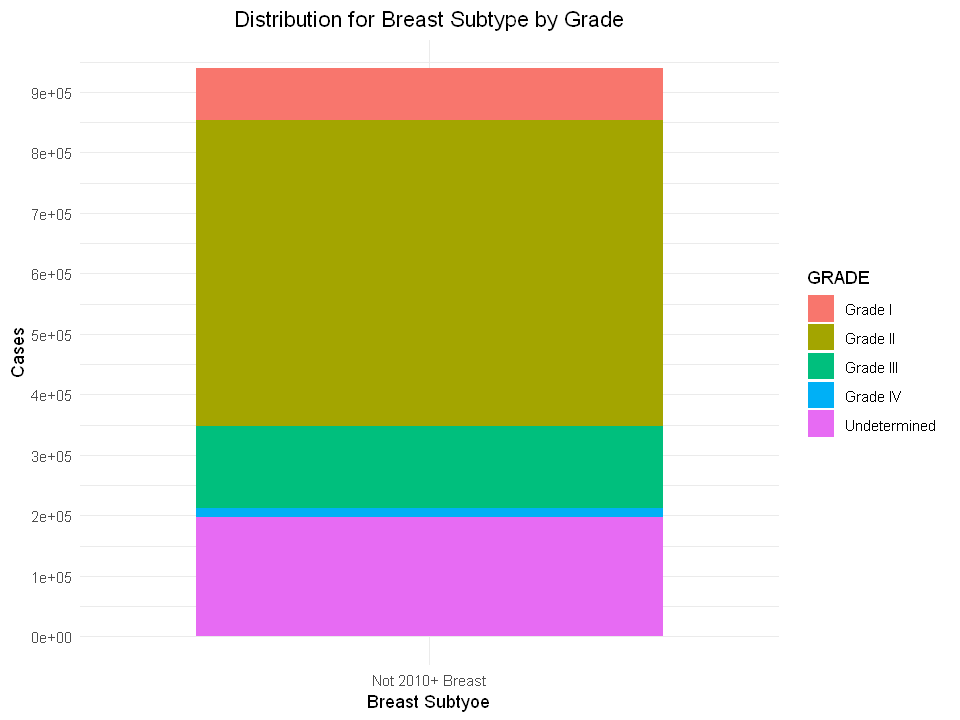

In [29]:
br <-ggplot(data=data, aes(factor(BRST_SUB))) +
  geom_bar(aes(fill=GRADE), width=0.8)+
  theme_minimal()+
  labs(title = "Distribution for Breast Subtype by Grade", x = "Breast Subtyoe", y = "Cases")+
  theme(plot.title = element_text(hjust = 0.5), axis.text.x = element_text(angle=0, vjust=1))+
  scale_y_continuous(breaks = seq(0, 1000000, by = 100000))
#scale_x_discrete(labels = c("In Situ", "Malignant", "No Longer Reportable"))

br